In [13]:
import pandas as pd
import pathlib


In [14]:
rubygems = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/rubygems/*.csv")])
versions = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/versions/*.csv")])
attestations = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/attestations/*.csv")])
gem_downloads = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/gem_downloads/*.csv")])
dependencies = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/dependencies/*.csv")])

/var/folders/p3/950_j_ps7xq47vrzdj1qvg940000gn/T/ipykernel_41143/3472372332.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  versions = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/versions/*.csv")])
/var/folders/p3/950_j_ps7xq47vrzdj1qvg940000gn/T/ipykernel_41143/3472372332.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  versions = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/versions/*.csv")])
/var/folders/p3/950_j_ps7xq47vrzdj1qvg940000gn/T/ipykernel_41143/3472372332.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  versions = pd.concat([pd.read_csv(f, index_col="id") for f in pathlib.Path('.').glob("tables/versions/*.csv")])
/var/folders/p3/950_j_ps7xq47vrzdj1qvg940000gn/T/ipykernel_41143/3472372332.py:2: DtypeWarning: Columns (15,1

<Axes: xlabel='day_pushed'>

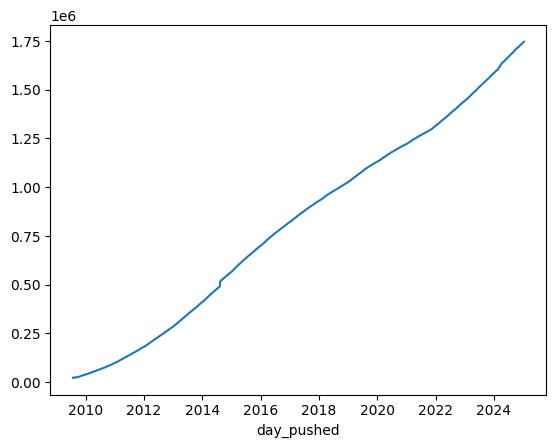

In [15]:
vs = versions.sort_values("created_at", ascending=True)
vs['day_pushed'] = pd.to_datetime(vs['created_at'], format='ISO8601').dt.date
vs.groupby("day_pushed")['full_name'].count().cumsum().plot()

<Axes: xlabel='day_pushed'>

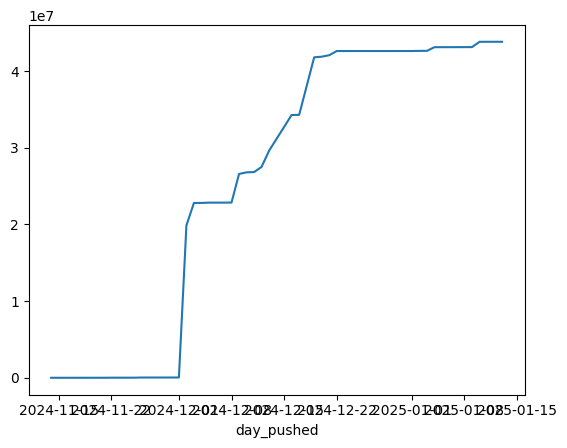

In [16]:
attestations.join(vs, how="inner", on='version_id', rsuffix="_version").join(gem_downloads.set_index('version_id'), how="inner", on='version_id', rsuffix="_gem_downloads").sort_values("day_pushed", ascending=True).groupby("day_pushed")['count'].sum().cumsum().plot()

In [17]:
attestations.join(vs, how="inner", on='version_id', rsuffix="_version").join(gem_downloads.set_index('version_id'), how="inner", on='version_id', rsuffix="_gem_downloads").sort_values(by=["count"], ascending=False)[['full_name', 'created_at', 'count']].head(25)

,full_name,created_at,count
id,,,
51,webrick-1.9.1,2024-12-02 05:48:56.957451,5814646
56,net-http-0.6.0,2024-12-02 08:42:35.836453,4391255
160,logger-1.6.4,2024-12-19 04:16:54.997126,3748489
54,date-3.4.1,2024-12-02 07:51:28.89031,3697465
80,faraday-2.12.2,2024-12-09 10:52:08.369295,3495804
65,io-console-0.8.0,2024-12-03 05:05:44.470755,2861069
55,logger-1.6.2,2024-12-02 08:04:14.078262,2741175
137,securerandom-0.4.1,2024-12-16 05:43:29.94218,1996018
135,timeout-0.4.3,2024-12-16 03:53:44.804142,1915752


In [18]:
ds = dependencies.join(rubygems['name'], how="inner", on='rubygem_id', rsuffix="_rubygems")
ds['dep_name'] = ds['name']
ds.join(vs[['full_name', 'day_pushed']], how="inner", on='version_id', rsuffix="_versions")


,requirements,created_at,updated_at,rubygem_id,version_id,scope,unresolved_name,name,dep_name,full_name,day_pushed
id,,,,,,,,,,,
10000000,~> 0.1,2024-03-17 16:02:21.86403,2024-03-17 16:02:21.86403,219800.0,1704928.0,runtime,NaN,isogametism_strangles,isogametism_strangles,conjunctivitis_enhydritic-0.1.7,2024-03-17
10000001,~> 0.1,2024-03-17 16:02:21.874907,2024-03-17 16:02:21.874907,219801.0,1704928.0,runtime,NaN,manageless_unhardihood,manageless_unhardihood,conjunctivitis_enhydritic-0.1.7,2024-03-17
10000002,~> 0.1,2024-03-17 16:02:21.885453,2024-03-17 16:02:21.885453,219717.0,1704928.0,runtime,NaN,scleronychia_conyrine,scleronychia_conyrine,conjunctivitis_enhydritic-0.1.7,2024-03-17
10000003,~> 0.1,2024-03-17 16:02:21.895961,2024-03-17 16:02:21.895961,219718.0,1704928.0,runtime,NaN,marasca_snobbishly,marasca_snobbishly,conjunctivitis_enhydritic-0.1.7,2024-03-17
10000004,~> 0.1,2024-03-17 16:02:21.909163,2024-03-17 16:02:21.909163,219719.0,1704928.0,runtime,NaN,whipping_juramental,whipping_juramental,conjunctivitis_enhydritic-0.1.7,2024-03-17
...,...,...,...,...,...,...,...,...,...,...,...
12249995,~> 0.1,2024-04-05 18:30:13.557535,2024-04-05 18:30:13.557535,216715.0,1718973.0,runtime,NaN,jagger_typometry_test,jagger_typometry_test,tolypeutine_ampulliform-0.1.7,2024-04-05
12249996,~> 0.1,2024-04-05 18:30:13.56101,2024-04-05 18:30:13.56101,216716.0,1718973.0,runtime,NaN,jagger_unethic_test,jagger_unethic_test,tolypeutine_ampulliform-0.1.7,2024-04-05
12249997,~> 0.1,2024-04-05 18:30:13.564594,2024-04-05 18:30:13.564594,220699.0,1718973.0,runtime,NaN,polygamous_entrepas,polygamous_entrepas,tolypeutine_ampulliform-0.1.7,2024-04-05


In [19]:
latest_downloads_date = list(pathlib.Path('/Users/segiddins/total-downloads/daily-downloads').glob("dates/*.csv"))
latest_downloads_date.sort()
latest_downloads_date = pd.to_datetime(latest_downloads_date[-1].stem)
thirty_days_ago = latest_downloads_date - pd.Timedelta(days=30)

latest_downloads = pd.read_csv("/Users/segiddins/total-downloads/daily-downloads/dates/{}.csv".format(latest_downloads_date.strftime("%Y-%m-%d")), index_col="name")
latest_downloads['date'] = latest_downloads_date
thirty_days_ago_downloads = pd.read_csv("/Users/segiddins/total-downloads/daily-downloads/dates/{}.csv".format(thirty_days_ago.strftime("%Y-%m-%d")), index_col="name")
thirty_days_ago_downloads['date'] = thirty_days_ago

# latest_downloads.join(thirty_days_ago_downloads, how="inner", on="date", rsuffix="_30_days_ago")
thirthy_days_downloads = latest_downloads['total_downloads'].combine(thirty_days_ago_downloads['total_downloads'], func=lambda x, y: x - y, fill_value=0)

Downloads in the last 30 days

In [20]:
"{:,} downloads in the last 30 days".format(thirthy_days_downloads.sum())

'2,497,124,495 downloads in the last 30 days'

Gems with 1MM+ downloads in the last 30 days

In [21]:
"{:,} gems with 1MM+ downloads in the last 30 days".format(thirthy_days_downloads[lambda x: x > 1_000_000].count())


'537 gems with 1MM+ downloads in the last 30 days'

Distribution of downloads in the last 30 days

<Axes: xlabel='name'>

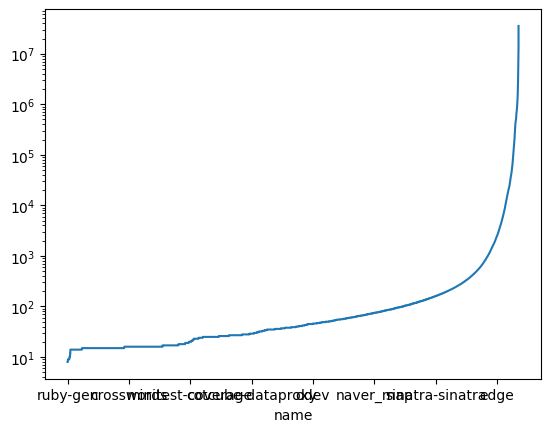

In [22]:
thirthy_days_downloads.sort_values(ascending=True).plot(logy=True)


<Axes: title={'center': 'Distribution of downloads in the last 30 days'}, ylabel='name'>

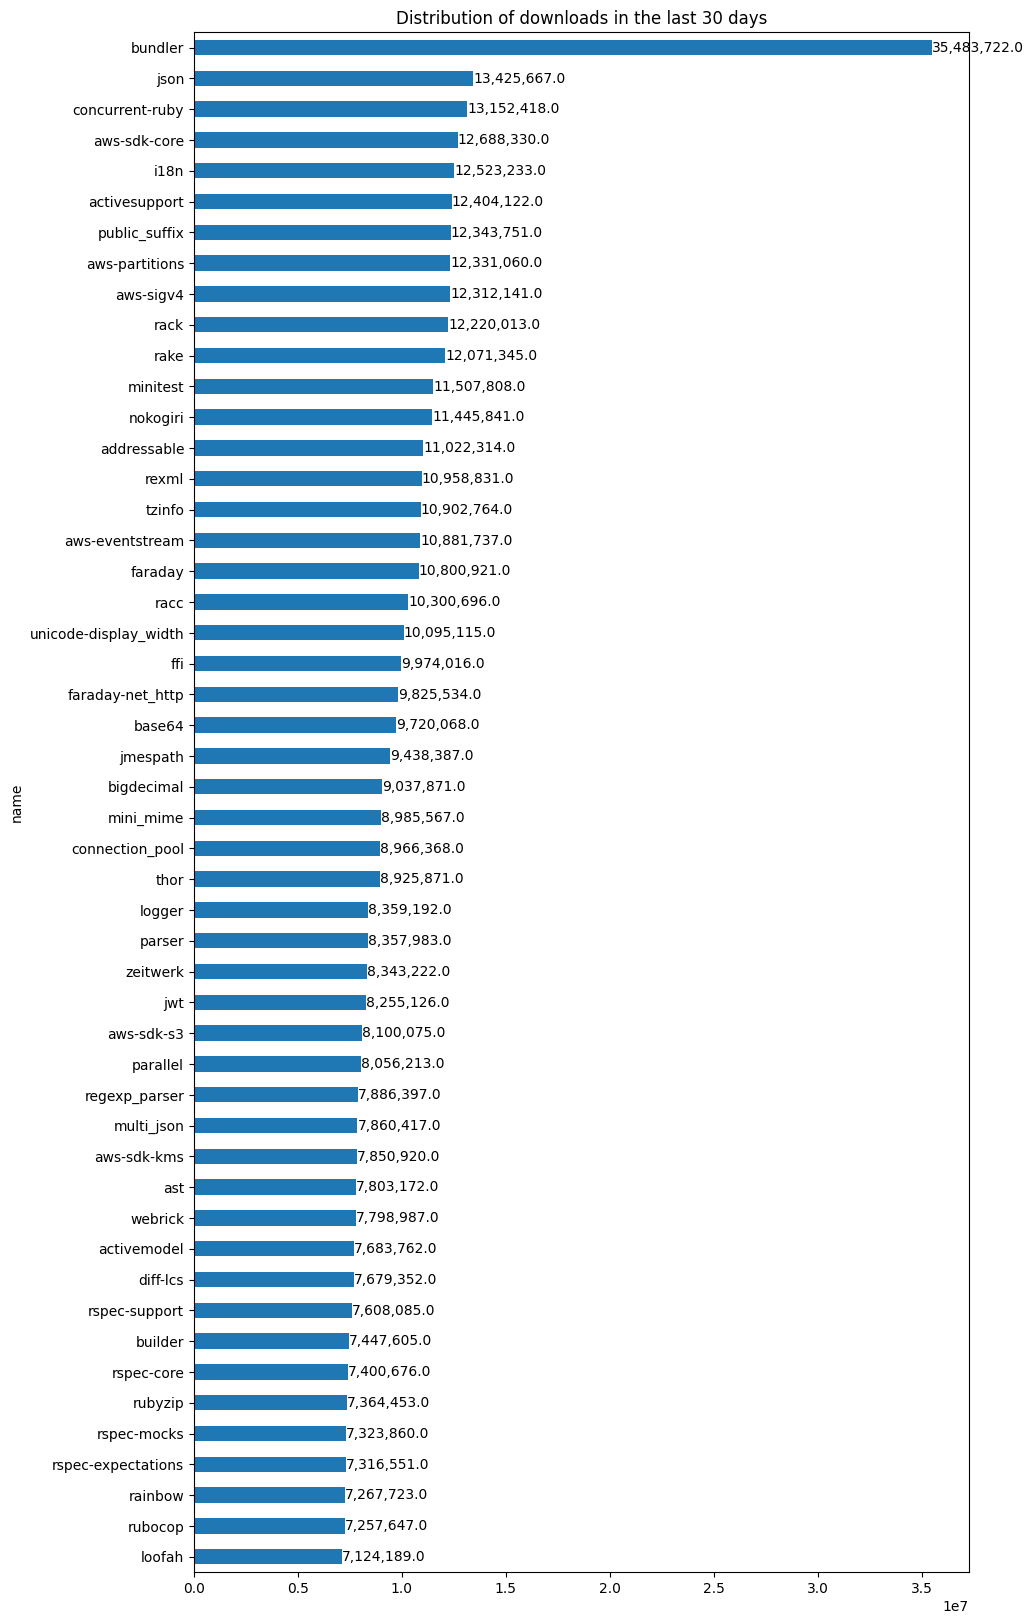

In [57]:
plt = thirthy_days_downloads.sort_values(ascending=False).head(50).sort_values(ascending=True).plot(kind="barh", label="Downloads in the last 30 days", title="Distribution of downloads in the last 30 days", figsize=(10, 20))
plt.bar_label(plt.containers[0], fmt='{:,}')
plt

In [58]:
aws_downloads = thirthy_days_downloads[thirthy_days_downloads.index.str.startswith('aws-', na=False)].sum()
total_downloads = thirthy_days_downloads.sum()
"{:,} downloads from AWS gems in the last 30 days\n{:,} downloads from all gems in the last 30 days\nAWS gems account for {:,.2f}% of all downloads".format(aws_downloads, total_downloads, aws_downloads / total_downloads * 100)

'258,530,279 downloads from AWS gems in the last 30 days\n2,497,124,495 downloads from all gems in the last 30 days\nAWS gems account for 10.35% of all downloads'